In [1]:
!pip install xgboost

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
import numpy as np
import matplotlib.dates as mdates

In [3]:
#second data_set. OPTION #2 Clean data WITHOUT outliers 
df = pd.read_csv('data_no_outliers.csv')
df = df.set_index('Txn_date')
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df

,Invoice_id,Cust_id,Product_Sub_category,Product_Category,Qty,Rate,Tax,Total_Amt,Store_type
Txn_date,,,,,,,,,
2016-01-02,80348907828,267124,Computers,Electronics,2,552,115.920,1219.920,TeleShop
2016-01-02,45127479223,273949,Kids,Books,1,366,38.430,404.430,Brick and Mortar
2016-01-02,21830961921,267482,Audio and video,Electronics,4,455,191.100,2011.100,Brick and Mortar
2016-01-02,35789988197,267508,Mens,Clothing,3,783,246.645,2595.645,e-Shop
2016-01-02,4947037174,271239,Electric appliances,Home and kitchen,3,228,71.820,755.820,e-Shop
...,...,...,...,...,...,...,...,...,...
2018-12-31,26100869804,273836,Cameras,Electronics,3,843,265.545,2794.545,e-Shop
2018-12-31,83963970126,274655,Kids,Clothing,5,213,111.825,1176.825,e-Shop
2018-12-31,51849180620,273963,Cameras,Electronics,3,617,194.355,2045.355,e-Shop


In [4]:
#let's build time based DF's

df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
#day of the week and weekends
df['DayOfWeek'] = df.index.dayofweek
df['Weekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

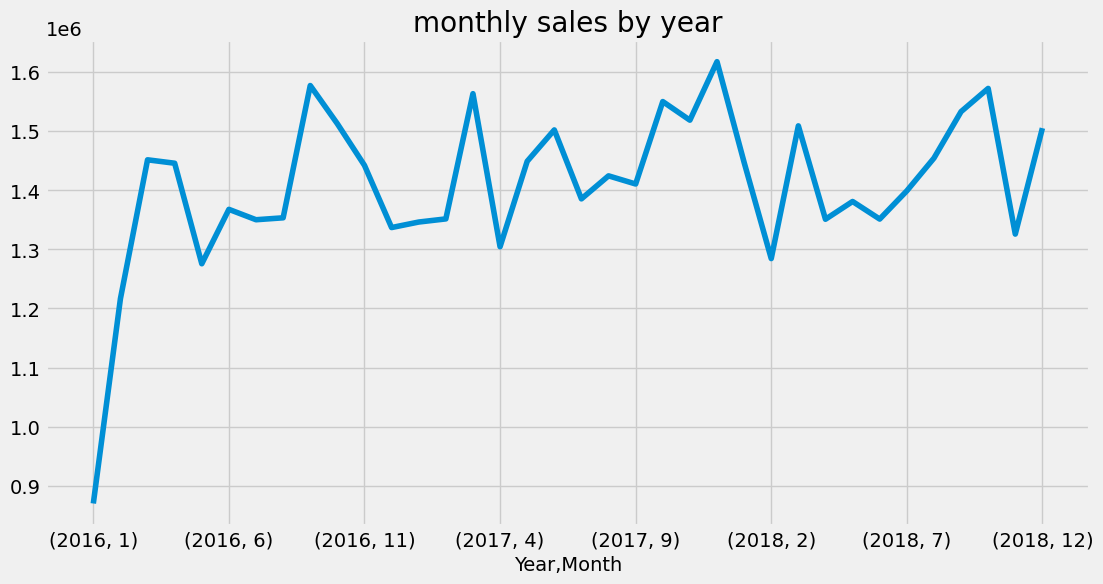

In [5]:
plt.figure(figsize=(12,6))
df.groupby(['Year', 'Month'])['Total_Amt'].sum().plot(kind='line', title='monthly sales by year')

plt.show()


In [6]:
df

,Invoice_id,Cust_id,Product_Sub_category,Product_Category,Qty,Rate,Tax,Total_Amt,Store_type,Year,Month,Day,DayOfWeek,Weekend
Txn_date,,,,,,,,,,,,,,
2016-01-02,80348907828,267124,Computers,Electronics,2,552,115.920,1219.920,TeleShop,2016,1,2,5,1
2016-01-02,45127479223,273949,Kids,Books,1,366,38.430,404.430,Brick and Mortar,2016,1,2,5,1
2016-01-02,21830961921,267482,Audio and video,Electronics,4,455,191.100,2011.100,Brick and Mortar,2016,1,2,5,1
2016-01-02,35789988197,267508,Mens,Clothing,3,783,246.645,2595.645,e-Shop,2016,1,2,5,1
2016-01-02,4947037174,271239,Electric appliances,Home and kitchen,3,228,71.820,755.820,e-Shop,2016,1,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,26100869804,273836,Cameras,Electronics,3,843,265.545,2794.545,e-Shop,2018,12,31,0,0
2018-12-31,83963970126,274655,Kids,Clothing,5,213,111.825,1176.825,e-Shop,2018,12,31,0,0
2018-12-31,51849180620,273963,Cameras,Electronics,3,617,194.355,2045.355,e-Shop,2018,12,31,0,0


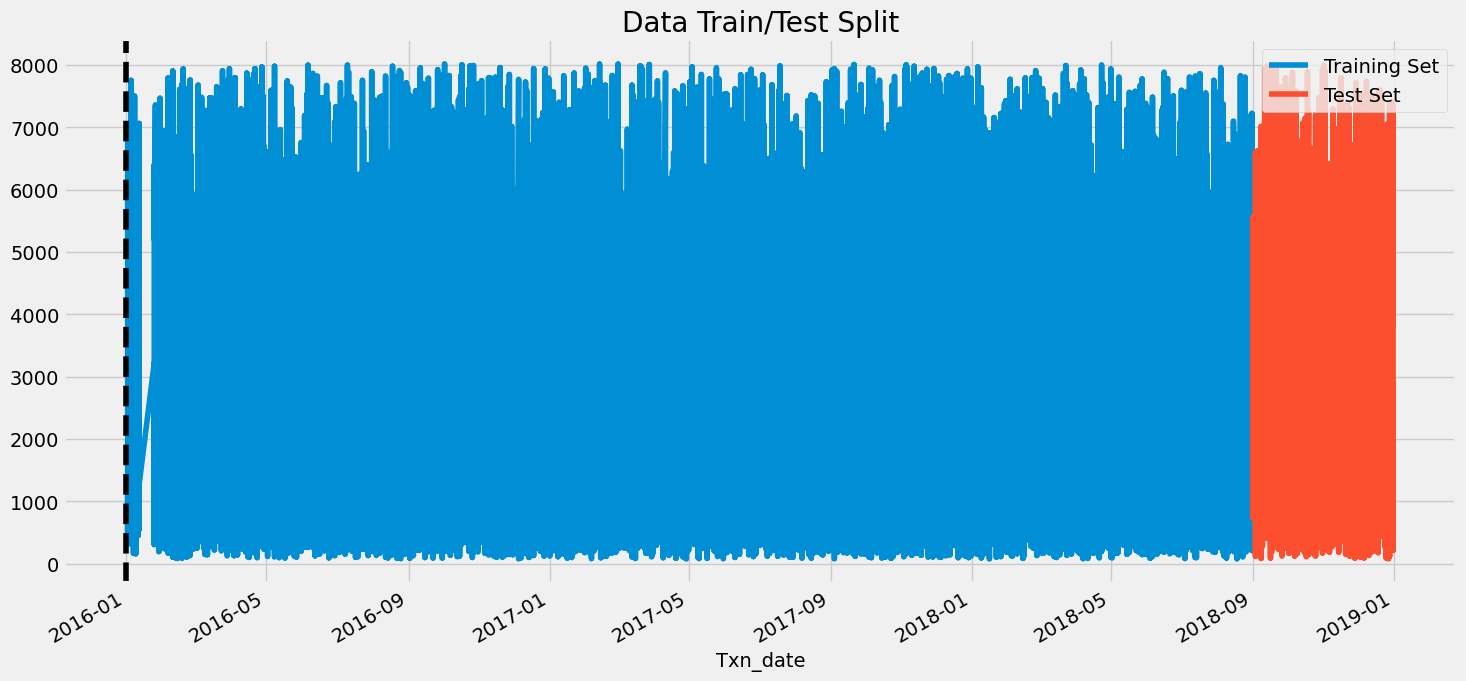

In [7]:
#train test split

train = df.loc[df.index < '2018-09-01']
test = df.loc[df.index >= '2018-09-01']

fig, ax = plt.subplots(figsize=(16, 8))
train['Total_Amt'].plot(kind = 'line', ax=ax, label='Training Set', title='Data Train/Test Split')
test['Total_Amt'].plot(kind = 'line', ax=ax, label='Test Set')

# Use mdates.date2num to convert datetime to proper format for matplotlib
divider_date = mdates.date2num(pd.to_datetime('2016-01-01'))
ax.axvline(divider_date, color='black', ls='--')

ax.legend(['Training Set', 'Test Set'])
plt.show()


/var/folders/wd/2sf_363j2qgdyy46qr3rysph0000gn/T/ipykernel_91679/956226568.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_weekly = train.resample('W').sum()['Total_Amt']
/var/folders/wd/2sf_363j2qgdyy46qr3rysph0000gn/T/ipykernel_91679/956226568.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  test_weekly = test.resample('W').sum()['Total_Amt']


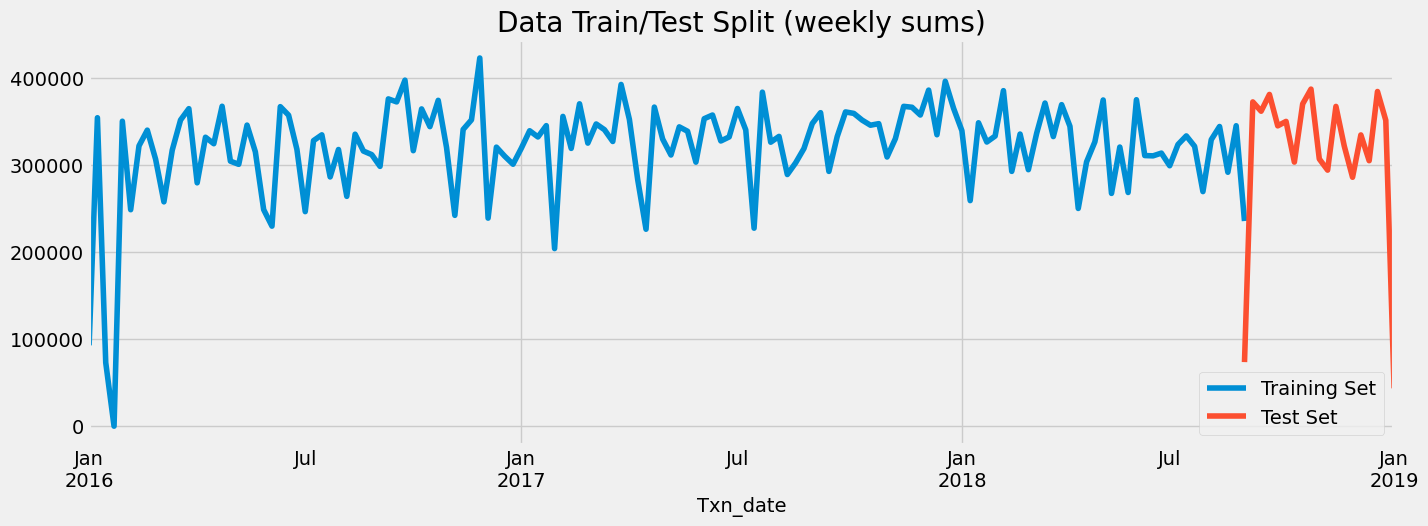

In [8]:
# resample data to weekly
train_weekly = train.resample('W').sum()['Total_Amt']
test_weekly = test.resample('W').sum()['Total_Amt']

fig, ax = plt.subplots(figsize=(15, 5))
train_weekly.plot(kind='line', ax=ax, label='Training Set')
test_weekly.plot(kind='line', ax=ax, label='Test Set')

divider_date = pd.to_datetime('2016-01-01')
ax.axvline(divider_date, color='black', ls='--')

ax.legend(['Training Set', 'Test Set'])
plt.title('Data Train/Test Split (weekly sums)')
plt.show()


In [9]:
#Feature different aproach (function)
def features(df):
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = features(df)

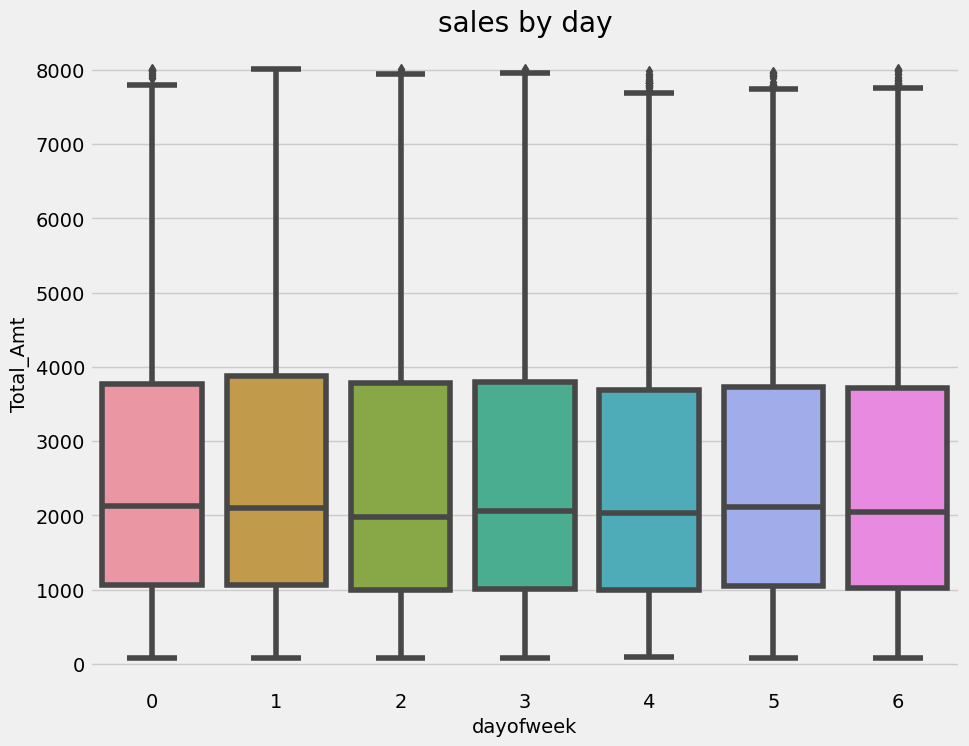

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='dayofweek', y='Total_Amt')
ax.set_title('sales by day')
plt.show()

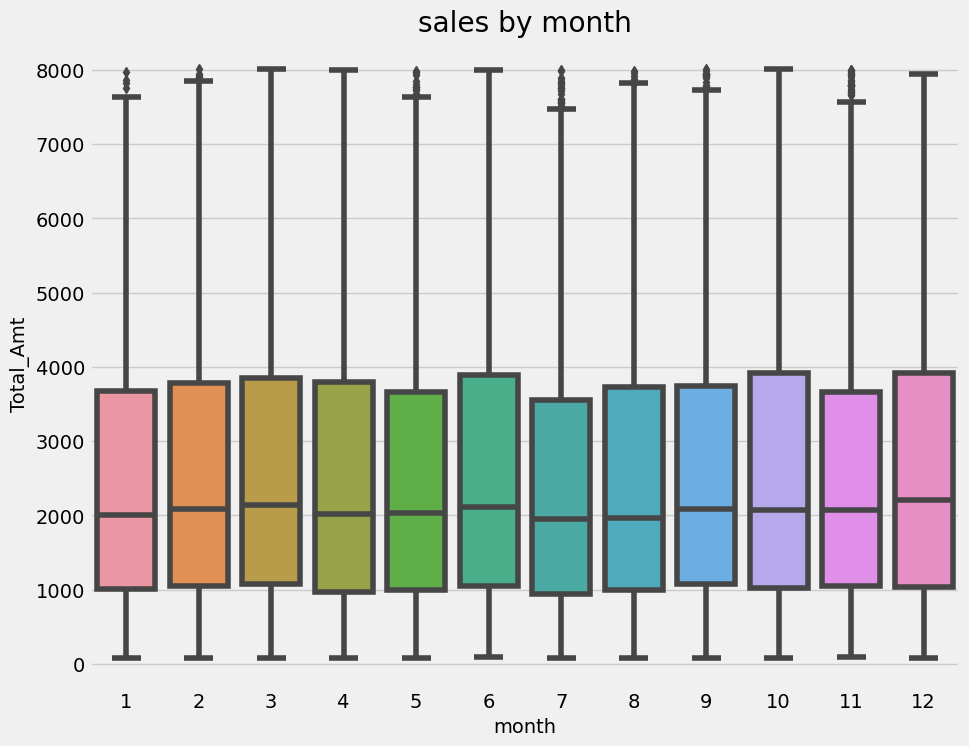

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='Total_Amt')
ax.set_title('sales by month')
plt.show()

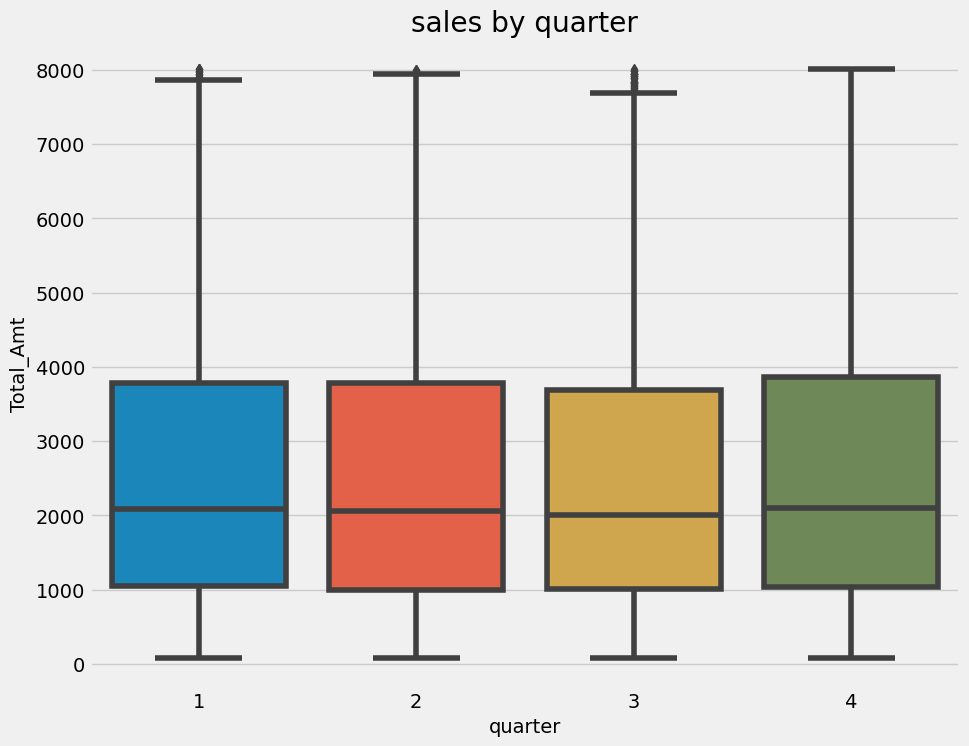

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='quarter', y='Total_Amt')
ax.set_title('sales by quarter')
plt.show()

In [13]:
#model
train = features(train)
test = features(test)

FEATURES = ['dayofyear', 'dayofweek', 'dayofmonth', 'quarter', 'month', 'year']
TARGET = 'Total_Amt'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [14]:
#regressor

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', n_estimators=1000, early_stopping_rounds=100, 
                       objective='reg:linear', max_depth=3, learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[15:24:25] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:3178.26242	validation_1-rmse:3175.45766
[100]	validation_0-rmse:2124.82100	validation_1-rmse:2093.48565
[200]	validation_0-rmse:1939.40506	validation_1-rmse:1908.95243
[300]	validation_0-rmse:1912.01885	validation_1-rmse:1891.14358
[400]	validation_0-rmse:1907.40160	validation_1-rmse:1891.84168
[418]	validation_0-rmse:1907.05875	validation_1-rmse:1892.10683


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=100,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

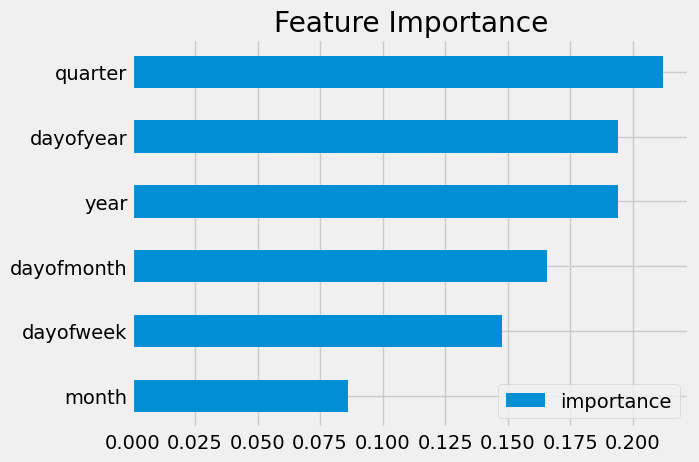

In [15]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

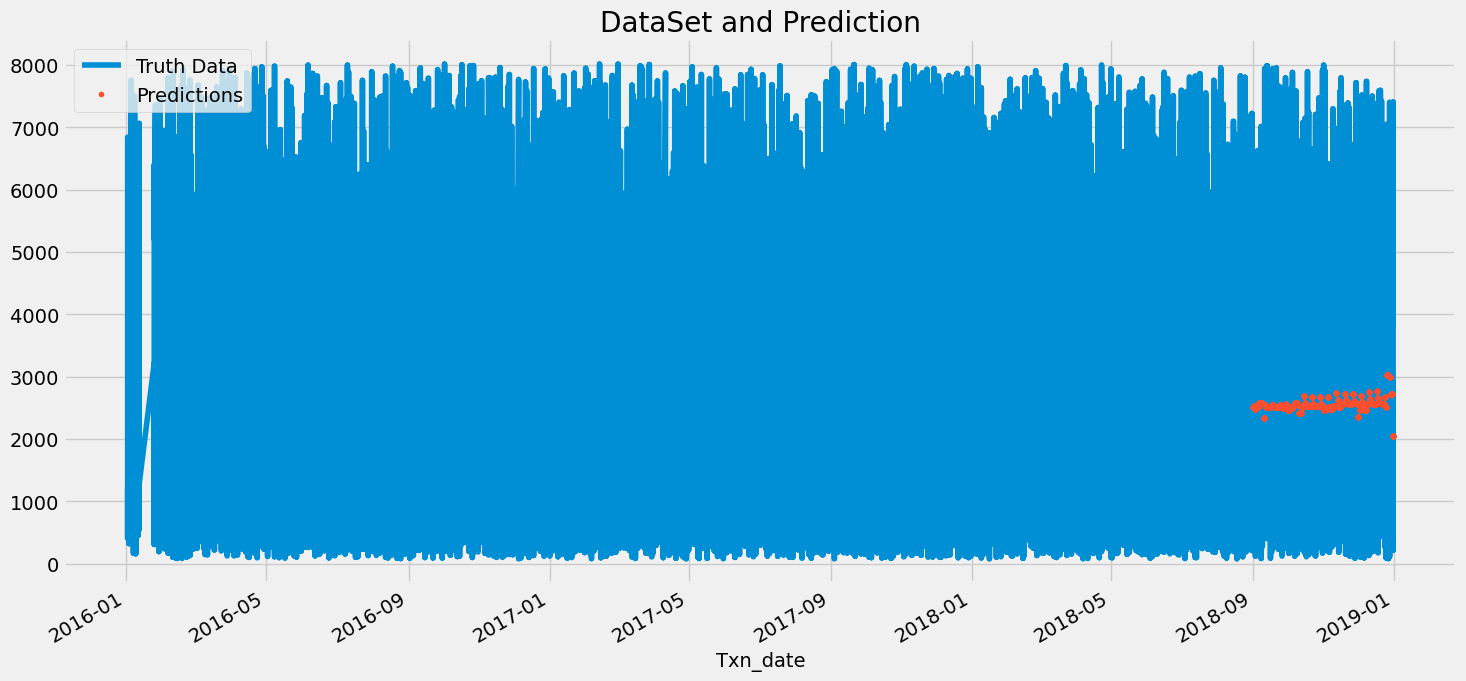

In [16]:
test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['Total_Amt']].plot(figsize=(16, 8))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('DataSet and Prediction')
plt.show()

In [36]:
df

,Invoice_id,Cust_id,Product_Sub_category,Product_Category,Qty,Rate,Tax,Total_Amt,Store_type,Year,...,DayOfWeek,Weekend,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,prediction
Txn_date,,,,,,,,,,,,,,,,,,,,,
2016-01-02,80348907828,267124,Computers,Electronics,2,552,115.920,1219.920,TeleShop,2016,...,5,1,5,1,1,2016,2,2,53,NaN
2016-01-02,45127479223,273949,Kids,Books,1,366,38.430,404.430,Brick and Mortar,2016,...,5,1,5,1,1,2016,2,2,53,NaN
2016-01-02,21830961921,267482,Audio and video,Electronics,4,455,191.100,2011.100,Brick and Mortar,2016,...,5,1,5,1,1,2016,2,2,53,NaN
2016-01-02,35789988197,267508,Mens,Clothing,3,783,246.645,2595.645,e-Shop,2016,...,5,1,5,1,1,2016,2,2,53,NaN
2016-01-02,4947037174,271239,Electric appliances,Home and kitchen,3,228,71.820,755.820,e-Shop,2016,...,5,1,5,1,1,2016,2,2,53,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,56380733343,273570,Women,Clothing,2,1319,276.990,2914.990,Brick and Mortar,2018,...,0,0,0,4,12,2018,365,31,1,2048.315186
2018-12-31,56380733343,273570,Women,Clothing,2,1319,276.990,2914.990,Brick and Mortar,2018,...,0,0,0,4,12,2018,365,31,1,2048.315186
2018-12-31,56380733343,273570,Women,Clothing,2,1319,276.990,2914.990,Brick and Mortar,2018,...,0,0,0,4,12,2018,365,31,1,2048.315186


In [18]:
df[['Total_Amt', 'prediction']].dropna()

,Total_Amt,prediction
Txn_date,,
2018-09-01,3591.25,2515.463867
2018-09-01,3591.25,2515.463867
2018-09-01,3591.25,2515.463867
2018-09-01,3591.25,2515.463867
2018-09-01,3591.25,2515.463867
...,...,...
2018-12-31,2914.99,2048.315186
2018-12-31,2914.99,2048.315186
2018-12-31,2914.99,2048.315186


In [37]:
#filetr the data based on the range

filtered_df = df.loc[(df.index > '10-01-2018') & (df.index < '10-14-2018')]



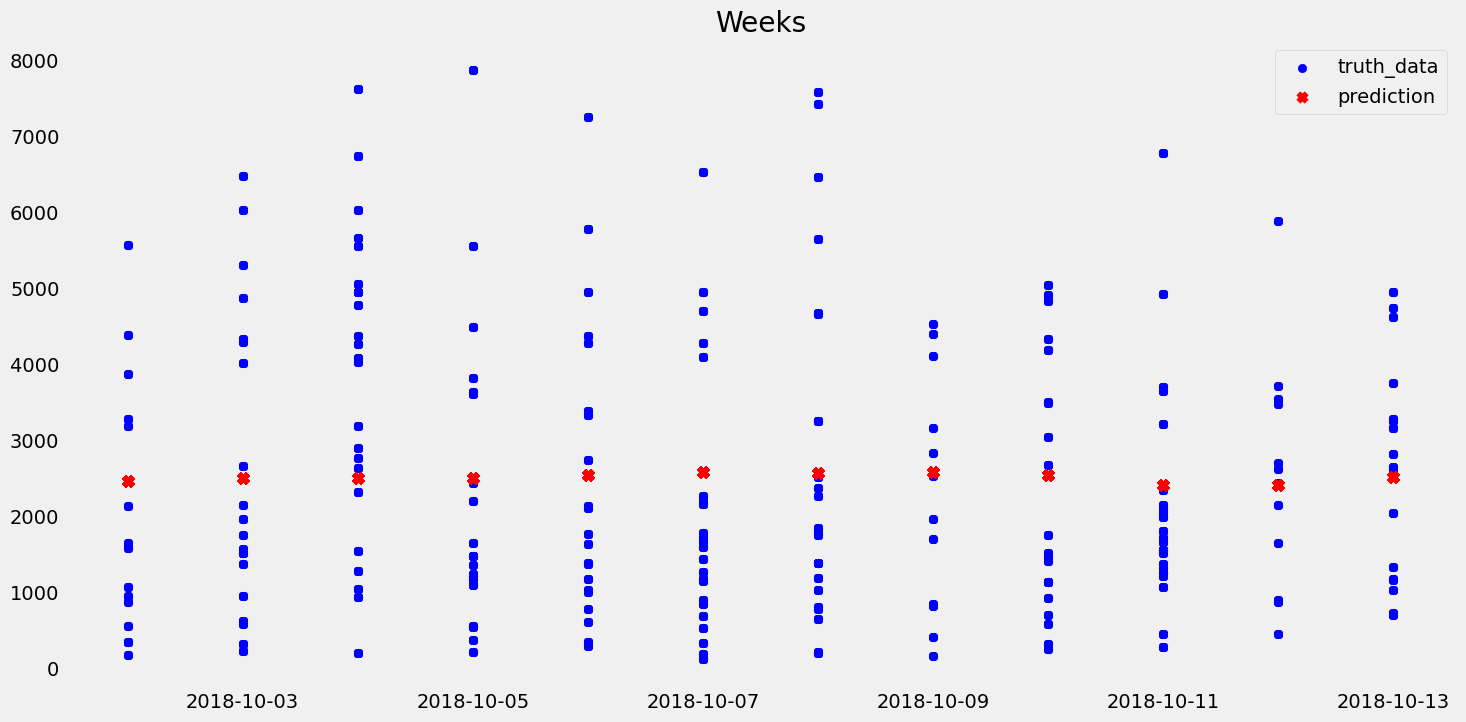

In [38]:
#scatter plot Total_Amt and Prediction

plt.figure(figsize=(16,8))
plt.scatter(filtered_df.index, filtered_df['Total_Amt'], label='truth_data', color='blue')
plt.scatter(filtered_df.index, filtered_df['prediction'], label="prediction", color='red', marker='x')

plt.title('Weeks')
plt.legend()
plt.grid()
plt.show()

In [39]:
score = np.sqrt(mean_squared_error(test['Total_Amt'], test['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 1890.95


In [40]:
test['error'] = np.abs(test[TARGET] - test['prediction'])
test['date'] = test.index.date
#best results
test.groupby(['date'])['error'].mean().sort_values(ascending=True).head(10)

date
2018-10-29    1088.726721
2018-12-06    1091.493570
2018-11-07    1091.924213
2018-10-11    1111.949821
2018-10-12    1128.560869
2018-12-11    1134.337662
2018-11-10    1180.749863
2018-10-13    1184.542896
2018-10-20    1191.307424
2018-11-30    1191.716444
Name: error, dtype: float64

In [41]:
#worst results
test.groupby(['date'])['error'].mean().sort_values(ascending=False).head(10)

date
2018-12-14    2207.819586
2018-10-28    2107.694136
2018-11-15    2054.277045
2018-12-20    2002.990942
2018-10-15    1961.188638
2018-10-18    1953.724260
2018-10-04    1946.539028
2018-09-29    1925.090614
2018-09-21    1922.182551
2018-09-13    1889.875760
Name: error, dtype: float64

In [43]:
#comparison with dummy model:
#1. calculating mean 
total_amt_mean = df["Total_Amt"].mean()
total_amt_mean

2570.9478111054846

In [44]:
#2. subtract the mean from each value and sq the result
diff_sq = (df['Total_Amt'] - total_amt_mean)**2

In [46]:
#3. calc the mean of sq diff
rmse_mean = np.sqrt(diff_sq.mean())

rmse_mean

1893.1437123223627